In [87]:
import numpy as np
import pandas as pd

In [88]:
import os

# Path to folder containing the CSV files
folder_path = "/content/drive/MyDrive/reserch project/Smart-Vote-ML-main/Function 4/Model 2/division_summeries"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Combine all CSV files into a single DataFrame
# catogariqed acoording to directory and divitional
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Adjust encoding if necessary, e.g., encoding='utf-8-sig'
    df['division'] = file.split('.')[0]  # Add division name as a column (from file name)
    dataframes.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(dataframes, ignore_index=True)

# Save combined DataFrame (optional)
combined_data.to_csv("combined_data.csv", index=False)

#print(combined_data.head())
#print(combined_data.info())


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# after catogariqed acoording to directory and divitional
combined_data.head()

,Category,Value,Percentage,division
0,Valid Votes,"34,399",95.62,Aranayake_summary
1,Rejected Votes,"1,576",4.38,Aranayake_summary
2,Total Polled,"35,975",68.73,Aranayake_summary
3,Total Electors,"52,343",NaN,Aranayake_summary
4,Valid Votes,"64,171",95.59,Akuressa_summary


In [91]:
combined_data.tail()

,Category,Value,Percentage,division
811,Total Electors,"168,137",NaN,Wellawaya_summary
812,Valid Votes,"33,579",91.63,Wiyaluwa_summary
813,Rejected Votes,"3,067",8.37,Wiyaluwa_summary
814,Total Polled,"36,646",67.68,Wiyaluwa_summary
815,Total Electors,"54,142",NaN,Wiyaluwa_summary


In [92]:
# Check for NaN values in 'Percentage' and 'Value' columns
print(combined_data[['Value', 'Percentage']].isnull().sum())


Value           0
Percentage    204
dtype: int64


In [93]:
# Remove rows where 'Category' is 'Total Electors'
combined_data = combined_data[combined_data['Category'] != 'Total Electors']


In [94]:
combined_data.head()

,Category,Value,Percentage,division
0,Valid Votes,"34,399",95.62,Aranayake_summary
1,Rejected Votes,"1,576",4.38,Aranayake_summary
2,Total Polled,"35,975",68.73,Aranayake_summary
4,Valid Votes,"64,171",95.59,Akuressa_summary
5,Rejected Votes,"2,960",4.41,Akuressa_summary


In [122]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=combined_data)

MessageError: Error: credential propagation was unsuccessful

In [95]:
# Check if the rows with 'Total Electors' have been removed
print(combined_data['Category'].value_counts())


Category
Valid Votes       204
Rejected Votes    204
Total Polled      204
Name: count, dtype: int64


In [96]:
import pandas as pd

# remove "," and Convert Value and Percentage columns to numeric
combined_data['Value'] = combined_data['Value'].replace(',', '', regex=True).astype(float)
combined_data['Percentage'] = combined_data['Percentage'].astype(float)

# Encode categorical columns
#combined_data = pd.get_dummies(combined_data, columns=['Category', 'division'], drop_first=True)


In [97]:
combined_data.head()

,Category,Value,Percentage,division
0,Valid Votes,34399.0,95.62,Aranayake_summary
1,Rejected Votes,1576.0,4.38,Aranayake_summary
2,Total Polled,35975.0,68.73,Aranayake_summary
4,Valid Votes,64171.0,95.59,Akuressa_summary
5,Rejected Votes,2960.0,4.41,Akuressa_summary


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf

In [99]:
# Initialize LabelEncoder
label_encoder_category = LabelEncoder()
label_encoder_division = LabelEncoder()

In [100]:
# Encode 'Category' and 'division'
combined_data['Category'] = label_encoder_category.fit_transform(combined_data['Category'])
combined_data['division'] = label_encoder_division.fit_transform(combined_data['division'])

In [101]:
combined_data.head()

,Category,Value,Percentage,division
0,2,34399.0,95.62,10
1,0,1576.0,4.38,10
2,1,35975.0,68.73,10
4,2,64171.0,95.59,2
5,0,2960.0,4.41,2


In [102]:
# Encode 'Category' and 'division'
combined_data['Category_encoded'] = label_encoder_category.fit_transform(combined_data['Category'])
combined_data['division_encoded'] = label_encoder_division.fit_transform(combined_data['division'])

In [103]:
# Select features (only numeric) and targets
X = combined_data[['Category_encoded', 'division_encoded']]
y = combined_data[['Value', 'Percentage']]

In [104]:
# Normalize target variables
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

In [105]:
# Split the dataset X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


In [106]:
# Build the neural network model (Artificial Neural Network (ANN) architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for 2 targets
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# Compile the model with mean squared error (MSE) loss for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Regression loss
              metrics=['mae'])  # Mean absolute error as additional metric


In [108]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 61.0308 - mae: 5.0596 - val_loss: 4.6522 - val_mae: 1.9057
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0516 - mae: 1.1498 - val_loss: 0.3289 - val_mae: 0.4239
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1800 - mae: 0.3088 - val_loss: 0.0790 - val_mae: 0.2150
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - mae: 0.2274 - val_loss: 0.0666 - val_mae: 0.2044
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0623 - mae: 0.2019 - val_loss: 0.0490 - val_mae: 0.1843
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0514 - mae: 0.1832 - val_loss: 0.0425 - val_mae: 0.1684
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0388 - mae: 0.1585 - val_loss: 0.0369 - val_mae: 0.1491
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0316 - mae: 0.1381 - val_loss: 0.0208 - val_mae: 0.1094
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mae

In [109]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict
predictions = model.predict(X_test)
print("Predictions (scaled):", predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mae: 0.0592 
Test Loss: 0.010775623843073845, Test MAE: 0.06311242282390594
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions (scaled): [[ 1.14284351e-01  9.98200834e-01]
 [ 5.24080545e-02  5.31941712e-01]
 [ 1.32941753e-02  9.55549106e-02]
 [ 6.32870942e-02  9.34548199e-01]
 [ 9.66780931e-02  9.76226151e-01]
 [ 5.93903810e-02  5.40657818e-01]
 [ 7.60348588e-02  9.50458348e-01]
 [ 9.45523530e-02  9.73572075e-01]
 [ 6.51047975e-02  9.36818898e-01]
 [ 9.72836763e-02  9.76983368e-01]
 [-3.69946659e-03  7.28829727e-02]
 [-5.82472980e-03  7.02312812e-02]
 [ 2.45884061e-04  7.78077468e-02]
 [-1.94842070e-02  5.31819686e-02]
 [ 4.39093858e-02  5.21333516e-01]
 [ 4.17845994e-02  5.18681347e-01]
 [-3.33468169e-02  5.68788871e-02]
 [ 7.36039430e-02  9.47430432e-01]
 [ 1.64708644e-02  1.01231553e-01]
 [ 7.69628435e-02  5.73850453e-01]
 [ 1.08818367e-01  9.91380274e-01]
 [ 4.81580049e-02  5.26638329e-01]
 [ 8.08947831e-02  9.56525147e-01]
 [ 5.

In [110]:
# Inverse scaling for predictions
predictions_original = scaler.inverse_transform(predictions)
print("Predictions (original scale):", predictions_original)

Predictions (original scale): [[ 1.49553703e+05  9.86949081e+01]
 [ 6.86975938e+04  5.33185654e+01]
 [ 1.75860039e+04  1.08494034e+01]
 [ 8.29136484e+04  9.25002289e+01]
 [ 1.26546938e+05  9.65563278e+01]
 [ 7.78216719e+04  5.41668205e+01]
 [ 9.95716328e+04  9.40486069e+01]
 [ 1.23769148e+05  9.62980347e+01]
 [ 8.52889062e+04  9.27212143e+01]
 [ 1.27338273e+05  9.66300201e+01]
 [-4.62023340e+03  8.64297104e+00]
 [-7.39739600e+03  8.38490772e+00]
 [ 5.35306030e+02  9.12224960e+00]
 [-2.52467520e+04  6.72566891e+00]
 [ 5.75920625e+04  5.22861786e+01]
 [ 5.48155234e+04  5.20280685e+01]
 [-4.33615508e+04  7.08545303e+00]
 [ 9.63950625e+04  9.37539291e+01]
 [ 2.17371055e+04  1.14018545e+01]
 [ 1.00784266e+05  5.73971252e+01]
 [ 1.42411094e+05  9.80311356e+01]
 [ 6.31438945e+04  5.28024406e+01]
 [ 1.05922281e+05  9.46390305e+01]
 [ 7.30605547e+04  5.37242928e+01]
 [ 7.46475938e+04  5.38717957e+01]
 [ 4.21254453e+04  5.08482018e+01]
 [-3.54494141e+04  6.64404106e+00]
 [ 3.71000684e+03  9.4173

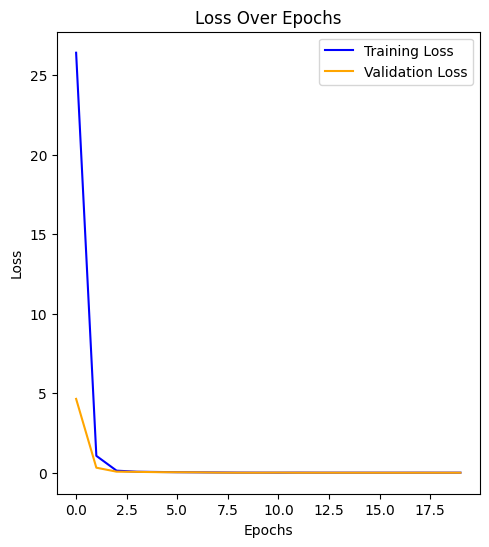

In [111]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))

# Loss plot against epocs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

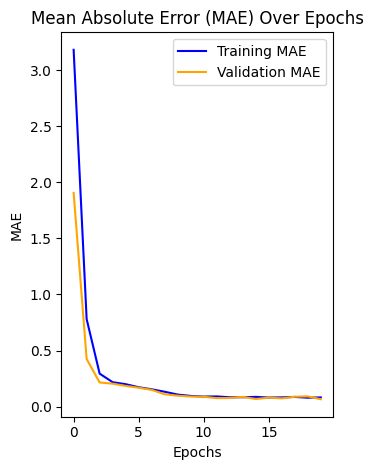

In [112]:
# MAE (Accuracy proxy for regression)
if 'mae' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE', color='blue')
    plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
    plt.title('Mean Absolute Error (MAE) Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.tight_layout()
plt.show()

In [113]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mae: 0.0592 
Test Loss: 0.010775623843073845
Test MAE: 0.06311242282390594


In [114]:
#testing with inputs

In [121]:
import numpy as np


new_data = np.array([[0, 1]])

# Print the predictions Percentage
print(f"Predicted Percentage: {test_mae}")

# Make predictions with the trained model
predictions = model.predict(new_data)

# Inverse scale the predictions to get the actual Value and Percentage
predictions_rescaled = scaler.inverse_transform(predictions)


# Print the predictions Percentage
print("Predicted rescaled", predictions_rescaled)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Percentage: 0.6311242282390594
Predicted rescaled [[1.9322574e+04 1.2997566e+01]]
